In [5]:
import json 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [70]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE

# Import pickle to save and load the model
import pickle

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# importing libraries for XGBoost classifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics.pairwise import pairwise_distances 
from pprint import pprint 

ModuleNotFoundError: No module named 'imblearn'

In [8]:
# Reading ratings file from github
ratings = pd.read_csv('C:/Users/User/Desktop/ANINDITADAS_SentimentRecommendedBasedProject/sample30.csv' , encoding ='latin-1')
ratings.head()   

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [10]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

In [11]:
ratings .shape

(30000, 15)

In [15]:
ratings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [14]:
ratings_clean = ratings.copy() 

In [18]:
#Removing 'reviews_didPurchase','reviews_doRecommend','reviews_userProvince' from the dataset
ratings_clean.drop(columns=['reviews_didPurchase','reviews_doRecommend','reviews_userProvince'], inplace=True)   

In [19]:
ratings_clean.shape 

(30000, 12)

In [20]:
# Checking NULLs again
null_count = ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum().sort_values(ascending=False)

null_perc = (ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum() * 100 / ratings_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data 

,Count,Percentage
reviews_userCity,28071,93.570000
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


In [23]:
# checking reviews
ratings_clean.user_sentiment.value_counts(normalize=True)  

Positive    0.887763
Negative    0.112237
Name: user_sentiment, dtype: float64

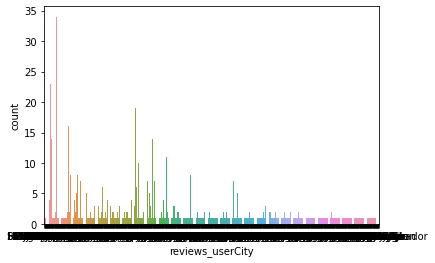

In [25]:
sns.countplot(x = 'reviews_userCity', data = ratings_clean)
plt.show() 

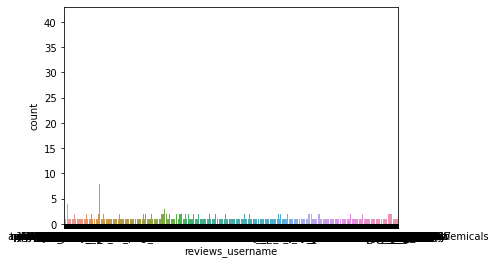

ValueError: 
Worth the $$
          ^
Expected end of text, found '$'  (at char 10), (line:1, col:11)

<Figure size 432x288 with 1 Axes>

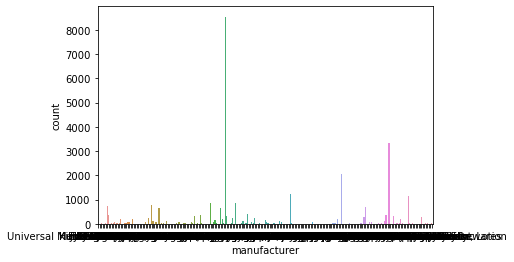

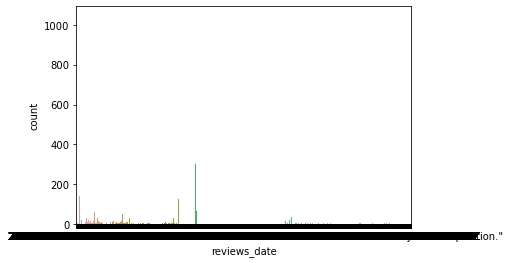

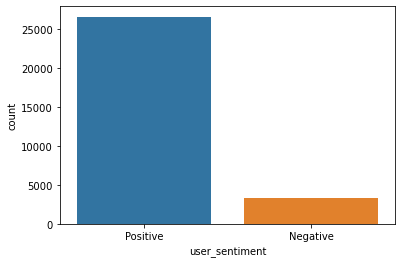

In [35]:
sns.countplot(x = 'reviews_username', data = ratings_clean)
plt.show()
sns.countplot(x = 'reviews_title', data = ratings_clean)
plt.show()
sns.countplot(x = 'manufacturer', data = ratings_clean)
plt.show()
sns.countplot(x = 'reviews_date', data = ratings_clean)
plt.show()
sns.countplot(x = 'user_sentiment', data = ratings_clean)
plt.show()  

In [32]:
# checking reviews
ratings_clean.reviews_title.value_counts(normalize=True)
ratings_clean.manufacturer.value_counts(normalize=True) 
ratings_clean.reviews_username.value_counts(normalize=True) 
ratings_clean.reviews_date.value_counts(normalize=True) 
ratings_clean.user_sentiment.value_counts(normalize=True) 

Positive    0.887763
Negative    0.112237
Name: user_sentiment, dtype: float64

In [36]:
ratings_clean.drop(columns=['reviews_userCity'], inplace=True) 
ratings_clean.drop(columns=['clean.manufacturer'], inplace=True) 

KeyError: "['reviews_userCity'] not found in axis"

In [28]:
# Checking NULLs again
null_count = ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum().sort_values(ascending=False)

null_perc = (ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum() * 100 / ratings_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data 

,Count,Percentage
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


In [29]:
ratings_clean.shape 

(30000, 11)

In [31]:
#Handeling Null Value
ratings_clean.user_sentiment.value_counts() 

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

In [ ]:
ratings_clean[ df_clean.user_sentiment.isna()] 

In [ ]:
sns.countplot(x = 'reviews_title', data = df_clean).set(title="Distribution of reviews rating by count", xlabel="reviews rating", ylabel="reviews count")
plt.show()  

In [37]:
ratings_clean.brand.value_counts(normalize=True).head(5) 

Clorox               0.352833
Warner Home Video    0.110833
Disney               0.040000
L'oreal Paris        0.039533
FOX                  0.029567
Name: brand, dtype: float64

In [38]:
# Before type conversion
ratings_clean.reviews_date.dtype 

dtype('O')

In [39]:
# After type conversion
ratings_clean.reviews_date.dtype 

dtype('O')

In [44]:
plt.figure(figsize = [10,6])

sns.boxplot(data=ratings_clean, x='user_sentiment', y='manufacturer', color='green')
plt.xticks(rotation = 45)

plt.tight_layout(pad = 4)
plt.show()   

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 720x432 with 0 Axes>

In [41]:
# Checking NULLs again
null_count = ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum().sort_values(ascending=False)

null_perc = (ratings_clean[ratings_clean.columns[ratings_clean.isna().any()]].isna().sum() * 100 / ratings_clean.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data  

,Count,Percentage
reviews_title,190,0.633333
manufacturer,141,0.470000
reviews_username,63,0.210000
reviews_date,46,0.153333
user_sentiment,1,0.003333


In [56]:
# Function to clean the text and remove all the unnecessary elements.
def clean_punctuation(ratings):
    ratings = ratings.lower() # Text to lowercase
    pattern = '[^\w\s]' # Removing punctuation
    ratings = re.sub(pattern, '', ratings)
    return ratings 

In [57]:
ratings['new_categories'] = ratings['categories'].apply(clean_punctuation)  

In [53]:
ratings.head(2) 

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [58]:
ratings['new_id'] = ratings['id'].apply(clean_punctuation) 
ratings.head(5) 

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,new_categories,new_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,movies music booksmusicrbmovies tvmovie bund...,av13o1a8gvklj3akuyj
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies...,av14lg0rjtxrf38qfs
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies...,av14lg0rjtxrf38qfs
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,personal caremedicine cabinetlubricantspermici...,av16khlejtxrf38vfn
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,personal caremedicine cabinetlubricantspermici...,av16khlejtxrf38vfn


In [59]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set) 

{'no', 'o', 'her', 'will', 'his', "wasn't", 'm', 'some', 'didn', 'out', 'at', 'this', 'wouldn', 'whom', 'all', 'of', 'own', 'itself', 'she', 'not', 'because', 'should', 'them', "hadn't", 'then', "shouldn't", 'yours', 'to', 'do', 'doesn', 'over', 'between', 'on', 'down', 'he', 'y', 'same', "she's", 'what', 'myself', 'each', 'won', 'there', "you'll", 'into', 'where', 'who', 'had', 'they', 'very', "mightn't", 'its', 'himself', 's', 'haven', "won't", 'few', 'couldn', 'about', 'other', 'mightn', 'me', 'ma', 'in', "doesn't", 'again', 'has', "you've", 'be', 'the', 'further', 'needn', 'him', 'weren', 'that', "haven't", 'it', 've', 'hadn', "don't", 'so', 'against', 'under', "should've", 'we', 'd', 'until', 'such', "you're", 're', 'is', 'hasn', 'if', 'for', 'aren', 'during', 'how', 'while', 'up', 'why', 't', 'ourselves', 'isn', 'ain', 'themselves', 'did', 'here', 'or', 'an', 'off', 'having', 'below', "wouldn't", 'a', 'ours', 'but', 'were', 'wasn', 'with', 'after', 'hers', 'you', 'been', 'am', 'y

In [65]:
# Function to remove the stopwords
def clean_stopwords(ratings):
    ratings = ratings.lower() # Text to lowercase
    words = word_tokenize(ratings) # Split sentences into words
    text_nostopwords = " ".join( [each_word for each_word in words if each_word not in stopwords_set] )
    return ratings 

In [66]:
ratings['stopwords_categories'] = ratings['categories'].apply(clean_stopwords)  

In [64]:
ratings.head(4) 

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,new_categories,new_id
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,movies music booksmusicrbmovies tvmovie bund...,av13o1a8gvklj3akuyj
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies...,av14lg0rjtxrf38qfs
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,foodpackaged foodssnackscrackerssnacks cookies...,av14lg0rjtxrf38qfs
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,personal caremedicine cabinetlubricantspermici...,av16khlejtxrf38vfn


In [69]:
# Handeling lemmatization
#Function to lemmatize the text
# nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm',  disable=["parser", "ner"])
def clean_lemma(text):
    ratings = []
    doc = nlp(text)
    for token in doc:
        ratings.append(token.lemma_)
    return " ".join(ratings) 

NameError: name 'spacy' is not defined

In [68]:
ratings['categories_lemmatized'] = ratings['categories'].apply(clean_lemma) 

NameError: name 'nlp' is not defined